In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Initialize the parameters
S0=50
sigma0=0.20
xi0=0.20
mu=0.10
p=[2] # 0, 10
alpha=[5]# 0.0013
tstart=0
tend=1
dt=1/365
N=int((tend-tstart)/dt)

#Create arrays to store S, sigma, xi at each time step
t=np.arange(tstart,tend,dt)
S=np.zeros(N)
S[0]=S0
sigma=np.zeros(N)
sigma[0]=sigma0
xi=np.zeros(N)
xi[0]=xi0



In [4]:
Sa = 5 # number of samples in the plot

# Generate Wiener increments
dw1 = np.array([])
dw2 = np.array([])
for j in range (Sa):
    dw1 = np.append(dw1, np.random.normal(0, np.sqrt(dt), N))
    dw2 = np.append(dw2, np.random.normal(0, np.sqrt(dt), N))
    w1 = np.cumsum(dw1)
    w2 = np.cumsum(dw2)


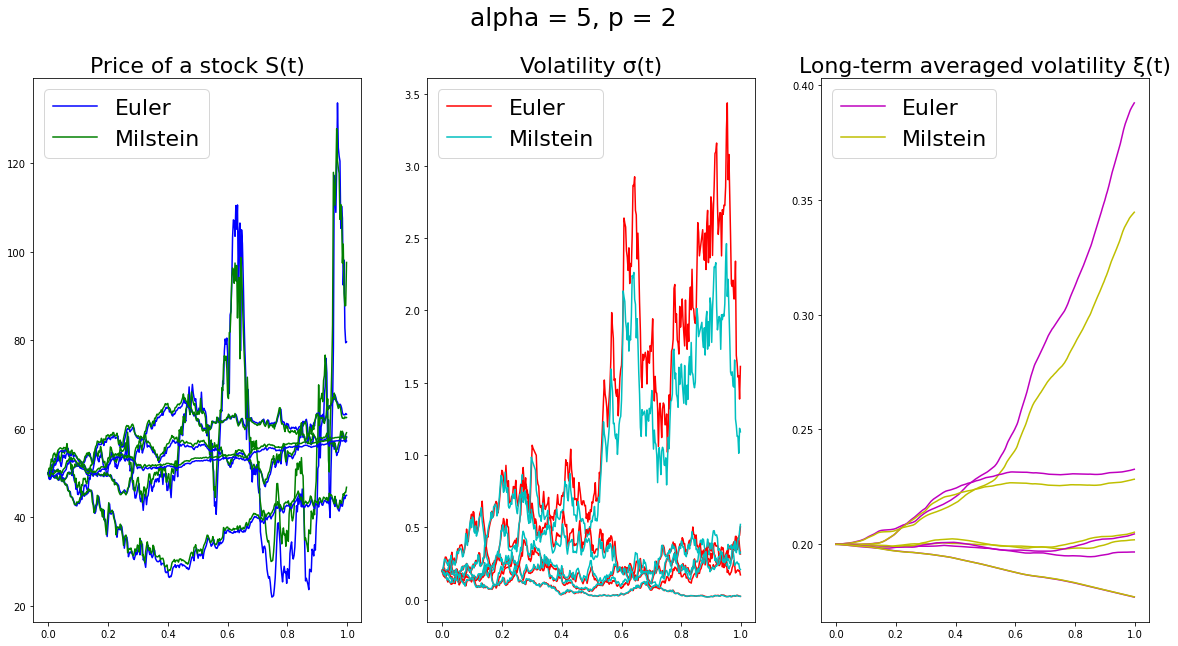

In [5]:

for k in range(len(p)):
    for q in range(len(alpha)):
        S=np.zeros(N)
        S[0]=S0
        sigma=np.zeros(N)
        sigma[0]=sigma0
        xi=np.zeros(N)
        xi[0]=xi0
        fig, ax = plt.subplots(1,3,sharex=True, figsize=(20,10))

        for j in range(Sa):
            #Euler scheme implementation
            for i in range(N-1):
                S[i+1]=S[i]+(mu*S[i]*dt)+(sigma[i]*S[i]*dw1[i+j*N])
                sigma[i+1]=sigma[i]-((sigma[i]-xi[i])*dt)+(p[k]*dw2[i+j*N]*sigma[i])
                xi[i+1]=xi[i]+((sigma[i]-xi[i])*dt/alpha[q])
            S_euler=np.array(S)
            sigma_euler=np.array(sigma)
            xi_euler=np.array(xi)

            #Milstein scheme implementation
            for i in range(N-1):
                S[i+1]=S[i]+(mu*S[i]*dt)+(sigma[i]*S[i]*dw1[i+1+j*N])+(0.5*sigma[i]*S[i])*sigma[i]*((dw1[i+1+j*N]*dw1[i+1+j*N])-dt)
                sigma[i+1]=sigma[i]-((sigma[i]-xi[i])*dt)+(p[k]*dw2[i+1+j*N]*sigma[i])+(0.5*p[k]*sigma[i])*p[k]*((dw2[i+1+j*N]*dw2[i+1+j*N])-dt)
                xi[i+1]=xi[i]+((sigma[i]-xi[i])*dt/alpha[q])
            S_milstein=np.array(S)
            sigma_milstein=np.array(sigma)
            xi_milstein=np.array(xi)

            #Plots
            plt.rc('legend', fontsize=22)    
            plt.rc('figure', titlesize=25)
            if j == 0:
                ax[0].plot(t, S_euler,color='b', label="Euler")
                ax[0].plot(t, S_milstein,color='g', label="Milstein")
                ax[0].set_title("Price of a stock S(t)", fontsize=22)
                ax[1].plot(t, sigma_euler,color='r', label="Euler")
                ax[1].plot(t, sigma_milstein, color='c', label="Milstein")
                ax[1].set_title("Volatility σ(t)", fontsize=22)
                ax[2].plot(t, xi_euler,color='m', label="Euler")
                ax[2].plot(t, xi_milstein, color='y', label="Milstein")
                ax[2].set_title("Long-term averaged volatility ξ(t)", fontsize=22)
            else:
                ax[0].plot(t, S_euler,color='b')
                ax[0].plot(t, S_milstein,color='g')
                ax[0].set_title("Price of a stock S(t)", fontsize=22)
                ax[1].plot(t, sigma_euler,color='r')
                ax[1].plot(t, sigma_milstein, color='c')
                ax[1].set_title("Volatility σ(t)", fontsize=22)
                ax[2].plot(t, xi_euler,color='m')
                ax[2].plot(t, xi_milstein, color='y')
                ax[2].set_title("Long-term averaged volatility ξ(t)", fontsize=22)
        ax[0].legend()
        ax[1].legend()
        ax[2].legend()
        #if alpha[q]>0.00137 and p[k]<3:
        #    ax[1].set_ylim([0, 0.3])
        #    ax[2].set_ylim([0, 0.3])
        #if p[k]>=5:
        #    ax[0].set_ylim([47, 58])
        title = "alpha = "+str(alpha[q])+", p = "+str(p[k])
        fig.suptitle(title)
        #plt.savefig("1Sa_alpha_"+str(alpha[q])+"_p_"+str(p[k])+".png", format='png')

In [6]:
# order of convergence Black-Scholes

# Initiate dt grid and lists to store errors
sigma=0.2
dt_values =  [(1/(365*8))*(R+1) for R in range(24)]  # [0.5*2 ** (R-10) for R in range(12)]
str_err_eu, str_err_mi, weak_err_eu, weak_err_mi= np.zeros(len(dt_values)), np.zeros(len(dt_values)), np.zeros(len(dt_values)), np.zeros(len(dt_values))
Sa = 100
index = 0
S0 = 40
ref1 = []
ref2 = []


# Loop over values of dt
for dt in dt_values:
    
    # Setup discretized grid 
    t = np.arange(dt, 1 + dt, dt)
    N = len(t)
    S_ex_sum, S_eu_sum, S_mi_sum = np.zeros(N), np.zeros(N), np.zeros(N)
    # ref1.append(dt)
    # ref2.append(dt**0.5)
    
    # Initiate vectors to store errors and time series
    err_eu, err_mi = np.zeros(N), np.zeros(N)
    S_ex = np.zeros(N)
    S_ex[0] = S0
    
    # Generate many sample paths
    for k in range(Sa):
        
        # Create Wiener process
        np.random.seed(k)
        dw = np.array([])
        dw = np.append(dw, np.random.normal(0, np.sqrt(dt), N))
        #dw = np.sqrt(dt)*np.random.randn(N)
        w = np.cumsum(dw)
           
        # Exact solution
        S_ex = S0 * np.exp((mu - 0.5*sigma0**2)*t + sigma0 * w)
        
        S_eu_t, S_mi_t, S_eu, S_mi = S0, S0, np.array([]), np.array([])
        for j in range(N):

            # Euler
            S_eu_t += mu*S_eu_t* dt + sigma0 * S_eu_t * dw[j]
            S_eu = np.append(S_eu, S_eu_t)
            
            # Milstein
            S_mi_t += mu*S_mi_t*dt + sigma0*S_mi_t*dw[j] + 0.5*sigma0**2*S_mi_t*(dw[j]**2 - dt)
            S_mi = np.append(S_mi, S_mi_t)
        
        err_eu += abs(S_ex - S_eu)
        err_mi += abs(S_ex - S_mi) 
            
        # Add Y and X values to previous sample paths
        S_ex_sum += S_ex
        S_eu_sum += S_eu
        S_mi_sum += S_mi

    # Compute mean of absolute errors and find maximum (strong error)
    str_err_eu[index] = np.amax(err_eu/Sa)
    str_err_mi[index] = np.amax(err_mi/Sa)
        
    # Compute absolute value of error of means and find maximum (weak error) 
    weak_err_eu[index] = np.max(abs(S_ex_sum - S_eu_sum)/Sa)
    weak_err_mi[index] = np.max(abs(S_ex_sum - S_mi_sum)/Sa)
    
    # ref1.append(dt)
    # ref2.append(dt**0.5)
    index+=1

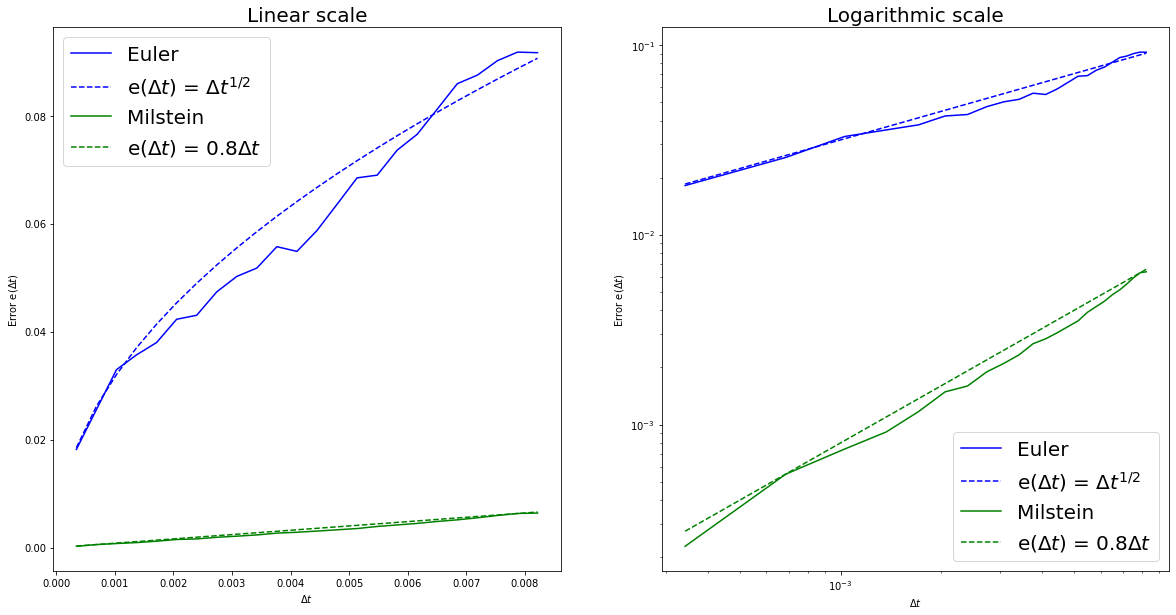

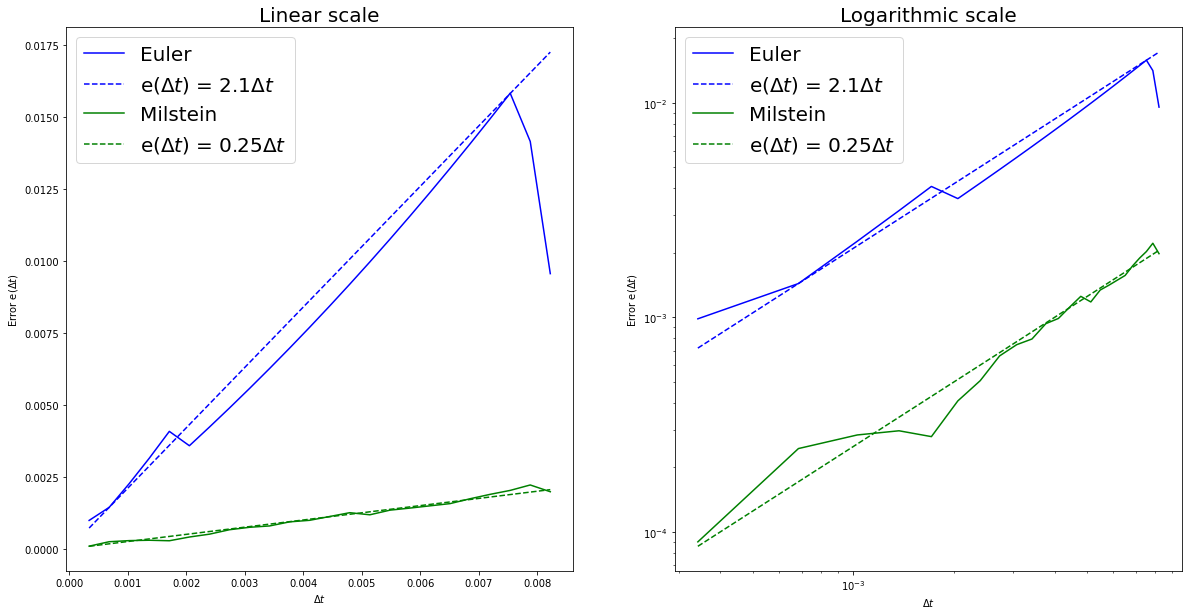

In [7]:
# Plot Black-Scholes
# strong order
ref1 = []
ref2 = []
for dt in dt_values:
    ref1.append(0.8*dt)
    ref2.append(dt**0.5)

fig, ax = plt.subplots(1,2, figsize=(20,10))
plt.rc('legend', fontsize=20)
ax[0].plot(dt_values, str_err_eu, label="Euler",color='b')
ax[0].plot(dt_values,  ref2, color='b', ls ='--', label = 'e($\Delta t$) = $\Delta t^{1/2}$')
ax[0].plot(dt_values, str_err_mi, label="Milstein",color='g')
ax[0].plot(dt_values, ref1, color='g', ls='--', label = 'e($\Delta t$) = $0.8\Delta t$')
ax[0].set_xlabel('$\Delta t$')
ax[0].set_ylabel('Error e($\Delta t$)')
ax[0].set_title("Linear scale", fontsize=20)
ax[1].loglog(dt_values, str_err_eu, label="Euler",color='b')
ax[1].loglog(dt_values,  ref2, color='b', ls ='--', label = 'e($\Delta t$) = $\Delta t^{1/2}$')
ax[1].loglog(dt_values, str_err_mi, label="Milstein",color='g')
ax[1].loglog(dt_values, ref1, color='g', ls='--', label = 'e($\Delta t$) = $0.8\Delta t$')
ax[1].set_xlabel('$\Delta t$')
ax[1].set_ylabel('Error e($\Delta t$)')
ax[1].set_title("Logarithmic scale", fontsize=20)
ax[0].legend()
ax[1].legend()
plt.savefig("lin&log_100Sa_strong_error"+".png", format='png')

# weak order
ref1 = []
ref2 = []
for dt in dt_values:
    ref1.append(0.25*dt)
    ref2.append(2.1*dt)

fig, ax = plt.subplots(1,2, figsize=(20,10))
plt.rc('legend', fontsize=20)
ax[0].plot(dt_values, weak_err_eu, label="Euler",color='b')
ax[0].plot(dt_values,  ref2, color='b', ls ='--', label = 'e($\Delta t$) = $2.1\Delta t$')
ax[0].plot(dt_values, weak_err_mi, label="Milstein",color='g')
ax[0].plot(dt_values, ref1, color='g', ls='--', label = 'e($\Delta t$) = $0.25\Delta t$')
ax[0].set_xlabel('$\Delta t$')
ax[0].set_ylabel('Error e($\Delta t$)')
ax[0].set_title("Linear scale", fontsize=20)
ax[1].loglog(dt_values, weak_err_eu, label="Euler",color='b')
ax[1].loglog(dt_values,  ref2, color='b', ls ='--', label = 'e($\Delta t$) = $2.1\Delta t$')
ax[1].loglog(dt_values, weak_err_mi, label="Milstein",color='g')
ax[1].loglog(dt_values, ref1, color='g', ls='--', label = 'e($\Delta t$) = $0.25\Delta t$')
ax[1].set_xlabel('$\Delta t$')
ax[1].set_ylabel('Error e($\Delta t$)')
ax[1].set_title("Logarithmic scale", fontsize=20)
ax[0].legend()
ax[1].legend()
plt.savefig("lin&log_100Sa_weak_error"+".png", format='png')


In [8]:
def Euler(N,dt,mu,dw1,dw2,S0,sigma0,xi0,p,alpha):
    S=np.zeros(N)
    S[0]=S0
    sigma=np.zeros(N)
    sigma[0]=sigma0
    xi=np.zeros(N)
    xi[0]=xi0
    for i in range(N-1):
        S[i+1]=S[i]+(mu*S[i]*dt)+(sigma[i]*S[i]*dw1[i])
        sigma[i+1]=sigma[i]-((sigma[i]-xi[i])*dt)+(p*dw2[i]*sigma[i])
        xi[i+1]=xi[i]+((sigma[i]-xi[i])*dt/alpha)
    S_euler=np.array(S)
    sigma_euler=np.array(sigma)
    xi_euler=np.array(xi)
    return S_euler, sigma_euler, xi_euler

In [9]:
def Milstein(N,dt,mu,dw1,dw2,S0,sigma0,xi0,p,alpha):
    S=np.zeros(N)
    S[0]=S0
    sigma=np.zeros(N)
    sigma[0]=sigma0
    xi=np.zeros(N)
    xi[0]=xi0
    for i in range(N-1):
#         if (i+j*N) >= len(dw1):
#             break
#         if i+j*N >= len(dw2):
#             break
        S[i+1]=S[i]+(mu*S[i]*dt)+(sigma[i]*S[i]*dw1[i])+(0.5*sigma[i]*S[i])*sigma[i]*((dw1[i]*dw1[i])-dt)
        sigma[i+1]=sigma[i]-((sigma[i]-xi[i])*dt)+(p*dw2[i]*sigma[i])+(0.5*p*sigma[i])*p*((dw2[i]*dw2[i])-dt)
        xi[i+1]=xi[i]+((sigma[i]-xi[i])*dt/alpha)
    S_milstein=np.array(S)
    sigma_milstein=np.array(sigma)
    xi_milstein=np.array(xi)
    return S_milstein, sigma_milstein, xi_milstein

In [12]:
#Initialize the parameters
S0=50
sigma0=0.20
xi0=0.20
mu=0.10
p=[0] # 0, 10
alpha=[5]# 0.0013
tstart=0
tend=1
dt=1/(365*8)
N=int((tend-tstart)/dt)
dt_values =  [(1/(365*8))*(2**(R+1)) for R in range(10)]
p=0
alpha=1

#Create arrays to store S, sigma, xi at each time step
t=np.arange(tstart,tend,dt)
S=np.zeros(N)
S[0]=S0
sigma=np.zeros(N)
sigma[0]=sigma0
xi=np.zeros(N)
xi[0]=xi0

Sa = 100 # number of samples in the plot

S_euler_exact_sum=np.zeros(len(dt_values))
sigma_euler_exact_sum=np.zeros(len(dt_values))
xi_euler_exact_sum=np.zeros(len(dt_values))
S_milstein_exact_sum=np.zeros(len(dt_values))
sigma_milstein_exact_sum=np.zeros(len(dt_values))
xi_milstein_exact_sum=np.zeros(len(dt_values))
index=0
str_err_S_eu =np.zeros(len(dt_values))
str_err_sigma_eu =np.zeros(len(dt_values))
str_err_xi_eu  =np.zeros(len(dt_values))
str_err_S_mi =np.zeros(len(dt_values))
str_err_sigma_mi =np.zeros(len(dt_values))
str_err_xi_mi  =np.zeros(len(dt_values))
weak_err_S_eu =np.zeros(len(dt_values))
weak_err_sigma_eu =np.zeros(len(dt_values))
weak_err_xi_eu  =np.zeros(len(dt_values))
weak_err_S_mi =np.zeros(len(dt_values))
weak_err_sigma_mi =np.zeros(len(dt_values))
weak_err_xi_mi  =np.zeros(len(dt_values))
for k in range(len(dt_values)):
    N =int(1/dt)
    err_S_eu =np.zeros(N)
    err_sigma_eu =np.zeros(N)
    err_xi_eu  =np.zeros(N)
    err_S_mi =np.zeros(N)
    err_sigma_mi =np.zeros(N)
    err_xi_mi  =np.zeros(N)
    S_euler_ex_sum  =np.zeros(N)
    sigma_euler_ex_sum  =np.zeros(N)
    xi_euler_ex_sum  =np.zeros(N)
    S_milstein_ex_sum  =np.zeros(N)
    sigma_milstein_ex_sum  =np.zeros(N)
    xi_milstein_ex_sum  =np.zeros(N)
    S_eu_sum  =np.zeros(N)
    sigma_eu_sum  =np.zeros(N)
    xi_eu_sum  =np.zeros(N)
    S_mi_sum  =np.zeros(N)
    sigma_mi_sum  =np.zeros(N)
    xi_mi_sum  =np.zeros(N)
    S_euler_exact=np.zeros((Sa,N))
    sigma_euler_exact=np.zeros((Sa,N))
    xi_euler_exact=np.zeros((Sa,N))
    S_milstein_exact=np.zeros((Sa,N))
    sigma_milstein_exact=np.zeros((Sa,N))
    xi_milstein_exact=np.zeros((Sa,N))
    for j in range(Sa):
        np.random.seed(k)
        dw1 = np.array([])
        dw1 = np.append(dw1, np.random.normal(0, np.sqrt(dt),N))
#         dw2=dw1
        dw2 = np.array([])
        dw2 = np.append(dw2, np.random.normal(0, np.sqrt(dt), N))
        S_euler_exact[j,:], sigma_euler_exact[j,:], xi_euler_exact[j,:]=Euler(N,dt,mu,dw1,dw2,S0,sigma0,xi0,p,alpha)
        S_milstein_exact[j,:], sigma_milstein_exact[j,:], xi_milstein_exact[j,:]=Milstein(N,dt,mu,dw1,dw2,S0,sigma0,xi0,p,alpha)
    for j in range (Sa):
        # Generate Wiener increments
#         np.random.seed(k)
#         dw1 = np.array([])
#         dw1 = np.append(dw1, np.random.normal(0, np.sqrt(dt),N))
# #         dw2=dw1
#         dw2 = np.array([])
#         dw2 = np.append(dw2, np.random.normal(0, np.sqrt(dt), N))
#         S_euler_exact, sigma_euler_exact, xi_euler_exact=Euler(N,dt,mu,dw1,dw2,S0,sigma0,xi0,p,alpha)
#         S_milstein_exact, sigma_milstein_exact, xi_milstein_exact=Milstein(N,dt,mu,dw1,dw2,S0,sigma0,xi0,p,alpha)
        np.random.seed(k)
        dw1 = np.array([])
        dw1 = np.append(dw1, np.random.normal(0, np.sqrt(dt), N))
        dw2 = np.array([])
        dw2 = np.append(dw2, np.random.normal(0, np.sqrt(dt), N))
        S_euler, sigma_euler, xi_euler=Euler(int(N),dt_values[k],mu,dw1,dw2,S0,sigma0,xi0,p,alpha)
        S_milstein, sigma_milstein, xi_milstein=Milstein(int(N),dt_values[k],mu,dw1,dw2,S0,sigma0,xi0,p,alpha)
        S_e=np.zeros(int(N))
        sigma_e=np.zeros(int(N))
        xi_e=np.zeros(int(N))
        S_m=np.zeros(int(N))
        sigma_m=np.zeros(int(N))
        xi_m=np.zeros(int(N))
        for i in range(int(N/2)):
            S_e[i]=S_euler_exact[j,2*i]
            sigma_e[i]=sigma_euler_exact[j,2*i]
            xi_e[i]=xi_euler_exact[j,2*i]
            S_m[i]=S_milstein_exact[j,2*i]
            sigma_m[i]=sigma_milstein_exact[j,2*i]
            xi_m[i]=xi_milstein_exact[j,2*i]
#         print(S_e)
        err_S_eu += abs(S_e - S_euler)
        err_sigma_eu += abs(sigma_e - sigma_euler)
        err_xi_eu += abs(xi_e - xi_euler)
        err_S_mi += abs(S_m - S_milstein)
        err_sigma_mi += abs(sigma_m- sigma_milstein)
        err_xi_mi += abs(xi_m - xi_milstein)
        S_euler_ex_sum += S_euler_exact[j,:]
        sigma_euler_ex_sum += sigma_euler_exact[j,:]
        xi_euler_ex_sum += xi_euler_exact[j,:]
        S_milstein_ex_sum += S_milstein_exact[j,:]
        sigma_milstein_ex_sum += sigma_milstein_exact[j,:]
        xi_milstein_ex_sum += xi_milstein_exact[j,:]
        S_eu_sum += S_euler
        sigma_eu_sum += sigma_euler
        xi_eu_sum += xi_euler
        S_mi_sum += S_milstein
        sigma_mi_sum += sigma_milstein
        xi_mi_sum += xi_milstein
#         S_euler_exact[j,:], sigma_euler_exact[j,:], xi_euler_exact[j,:]=S_euler, sigma_euler, xi_euler
#         S_milstein_exact[j,:], sigma_milstein_exact[j,:], xi_milstein_exact[j,:]=S_milstein, sigma_milstein, xi_milstein
    dt=dt_values[k]
    # Compute mean of absolute errors and find maximum (strong error)
    str_err_S_eu[index] = np.amax(err_S_eu/Sa)
    str_err_sigma_eu[index] = np.amax(err_sigma_eu/Sa)
    str_err_xi_eu[index] = np.amax(err_xi_eu/Sa)
    str_err_S_mi[index] = np.amax(err_S_mi/Sa)
    str_err_sigma_mi[index] = np.amax(err_sigma_mi/Sa)
    str_err_xi_mi[index] = np.amax(err_xi_mi/Sa)
        
    # Compute absolute value of error of means and find maximum (weak error) 
    weak_err_S_eu[index] = np.max(abs(S_euler_ex_sum - S_eu_sum)/Sa)
    weak_err_sigma_eu[index] = np.max(abs(sigma_euler_ex_sum - sigma_eu_sum)/Sa)
    weak_err_xi_eu[index] = np.max(abs(xi_euler_ex_sum - xi_eu_sum)/Sa)
    weak_err_S_mi[index] = np.max(abs(S_milstein_ex_sum - S_mi_sum)/Sa)
    weak_err_sigma_mi[index] = np.max(abs(sigma_milstein_ex_sum - sigma_mi_sum)/Sa)
    weak_err_xi_mi[index] = np.max(abs(xi_milstein_ex_sum - xi_mi_sum)/Sa)
    
#     ref1.append(dt)
    # ref2.append(dt**0.5)
    index+=1
        
       

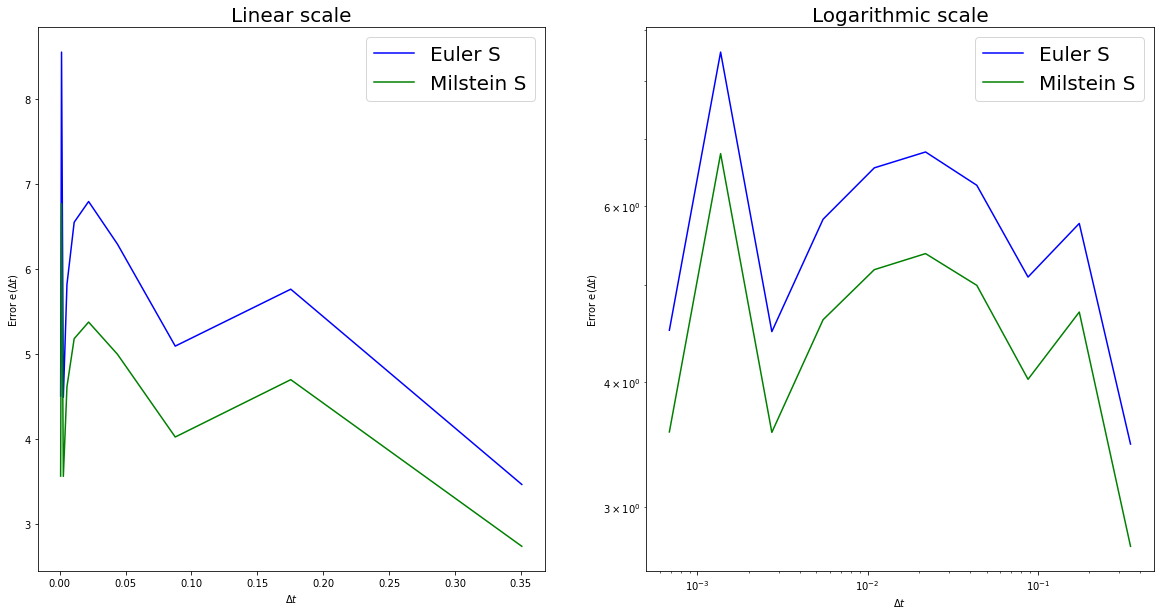

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
plt.rc('legend', fontsize=20)
ax[0].plot(dt_values, weak_err_S_eu, label="Euler S",color='b')
# ax[0].plot(dt_values, weak_err_sigma_eu, label="Euler sigma",color='b')
# ax[0].plot(dt_values, weak_err_xi_eu, label="Euler xi",color='b')
# ax[0].plot(dt_values,  ref2, color='b', ls ='--', label = 'e($\Delta t$) = $2.1\Delta t$')
ax[0].plot(dt_values, weak_err_S_mi, label="Milstein S",color='g')
# ax[0].plot(dt_values, weak_err_sigma_mi, label="Milstein sigma",color='g')
# ax[0].plot(dt_values, weak_err_xi_mi, label="Milstein xi",color='g')
# ax[0].plot(dt_values, ref1, color='g', ls='--', label = 'e($\Delta t$) = $0.25\Delta t$')
ax[0].set_xlabel('$\Delta t$')
ax[0].set_ylabel('Error e($\Delta t$)')
ax[0].set_title("Linear scale", fontsize=20)
ax[1].loglog(dt_values, weak_err_S_eu, label="Euler S",color='b')
# ax[1].loglog(dt_values, weak_err_sigma_eu, label="Euler sigma",color='b')
# ax[1].loglog(dt_values, weak_err_xi_eu, label="Euler xi",color='b')
# ax[1].loglog(dt_values,  ref2, color='b', ls ='--', label = 'e($\Delta t$) = $2.1\Delta t$')
ax[1].loglog(dt_values, weak_err_S_mi, label="Milstein S",color='g')
# ax[1].loglog(dt_values, weak_err_sigma_mi, label="Milstein sigma",color='g')
# ax[1].loglog(dt_values, weak_err_xi_mi, label="Milstein xi",color='g')
# ax[1].loglog(dt_values, ref1, color='g', ls='--', label = 'e($\Delta t$) = $0.25\Delta t$')
ax[1].set_xlabel('$\Delta t$')
ax[1].set_ylabel('Error e($\Delta t$)')
ax[1].set_title("Logarithmic scale", fontsize=20)
ax[0].legend()
ax[1].legend()
plt.savefig("lin&log_100Sa_weak_error_e"+".png", format='png')